In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import numpy as np

In [38]:
data = pd.read_csv('/content/drive/MyDrive/DataML/cleaneddata_2.csv')

In [39]:
data.head()

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,allegations_per_officer,mean,std,y,y2,y3
0,9.0,F,White,0.0,15.0,1.0,6.0,1957.0,0,1,0,0,0,1,12.815172,11.9869,12.501372,3,2,2
1,9.0,M,White,0.0,6.0,2.0,3.0,1958.0,0,1,0,0,0,1,12.815172,11.9869,12.501372,2,2,1
2,9.0,M,White,0.0,30.0,1.0,14.0,1961.0,0,1,0,0,0,1,12.815172,11.9869,12.501372,5,3,2
3,9.0,M,White,0.0,22.0,0.0,12.0,1957.0,0,1,0,0,0,1,12.815172,11.9869,12.501372,5,3,2
4,9.0,M,White,0.0,17.0,1.0,9.0,1962.0,0,1,0,0,0,1,12.815172,11.9869,12.501372,4,3,2


In [40]:
data.isna().sum()

district                   0
gender                     0
race                       0
major_award_count          0
allegation_count           0
sustained_count            0
unsustained_count          0
birth_year                 0
black                      0
white                      0
hispanic                   0
blackpop                   0
whitepop                   0
hispanicpop                0
allegations_per_officer    0
mean                       0
std                        0
y                          0
y2                         0
y3                         0
dtype: int64

In [41]:

data.isnull().sum()

district                   0
gender                     0
race                       0
major_award_count          0
allegation_count           0
sustained_count            0
unsustained_count          0
birth_year                 0
black                      0
white                      0
hispanic                   0
blackpop                   0
whitepop                   0
hispanicpop                0
allegations_per_officer    0
mean                       0
std                        0
y                          0
y2                         0
y3                         0
dtype: int64

In [42]:
data.describe()

,district,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,allegations_per_officer,mean,std,y,y2,y3
count,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000,9943.000000
mean,11.723222,0.145731,11.150256,0.816051,4.494116,1972.149854,0.257769,0.696772,0.045459,0.436287,0.299909,0.263804,11.246927,11.150256,12.434137,2.575179,1.867545,1.356029
std,7.100001,0.422396,12.739950,1.573281,6.865678,9.350055,0.437428,0.459676,0.208319,0.495949,0.458241,0.440716,2.448797,1.937761,2.067415,1.552720,0.785131,0.478848
min,1.000000,0.000000,0.000000,0.000000,0.000000,1956.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.929508,7.682648,8.340430,1.000000,1.000000,1.000000
25%,6.000000,0.000000,2.000000,0.000000,0.000000,1965.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.598639,10.180498,10.795533,1.000000,1.000000,1.000000
50%,11.000000,0.000000,7.000000,0.000000,2.000000,1971.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.532450,10.699187,12.453097,2.000000,2.000000,1.000000
75%,18.000000,0.000000,15.000000,1.000000,6.000000,1979.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,12.611457,12.154589,13.756990,4.000000,3.000000,2.000000
max,25.000000,5.000000,132.000000,25.000000,76.000000,1995.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.761840,15.550388,16.291288,5.000000,3.000000,2.000000


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [44]:
data = data.drop(['y', 'y2', 'y3', 'allegations_per_officer', 'mean', 'std'], axis=1)

In [45]:
data

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop
0,9.0,F,White,0.0,15.0,1.0,6.0,1957.0,0,1,0,0,0,1
1,9.0,M,White,0.0,6.0,2.0,3.0,1958.0,0,1,0,0,0,1
2,9.0,M,White,0.0,30.0,1.0,14.0,1961.0,0,1,0,0,0,1
3,9.0,M,White,0.0,22.0,0.0,12.0,1957.0,0,1,0,0,0,1
4,9.0,M,White,0.0,17.0,1.0,9.0,1962.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,22.0,M,White,0.0,3.0,0.0,0.0,1979.0,0,1,0,1,0,0
9939,22.0,M,White,0.0,16.0,0.0,6.0,1970.0,0,1,0,1,0,0
9940,22.0,M,White,0.0,2.0,0.0,2.0,1972.0,0,1,0,1,0,0
9941,22.0,M,White,0.0,5.0,2.0,1.0,1969.0,0,1,0,1,0,0


In [46]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [47]:
data['gender']= label_encoder.fit_transform(data['gender']) 

In [48]:
data['race']= label_encoder.fit_transform(data['race']) 

In [49]:
data

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop
0,9.0,0,5,0.0,15.0,1.0,6.0,1957.0,0,1,0,0,0,1
1,9.0,1,5,0.0,6.0,2.0,3.0,1958.0,0,1,0,0,0,1
2,9.0,1,5,0.0,30.0,1.0,14.0,1961.0,0,1,0,0,0,1
3,9.0,1,5,0.0,22.0,0.0,12.0,1957.0,0,1,0,0,0,1
4,9.0,1,5,0.0,17.0,1.0,9.0,1962.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,22.0,1,5,0.0,3.0,0.0,0.0,1979.0,0,1,0,1,0,0
9939,22.0,1,5,0.0,16.0,0.0,6.0,1970.0,0,1,0,1,0,0
9940,22.0,1,5,0.0,2.0,0.0,2.0,1972.0,0,1,0,1,0,0
9941,22.0,1,5,0.0,5.0,2.0,1.0,1969.0,0,1,0,1,0,0


In [50]:
mms = preprocessing.MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [51]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

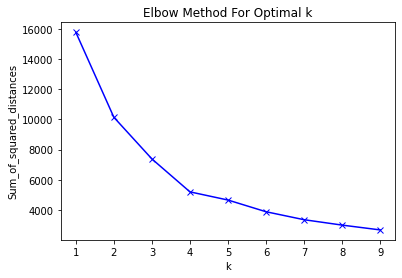

In [52]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Ideal number of clusters is 4

In [53]:
KMeans_Final = KMeans(n_clusters=4)

In [54]:
K = KMeans_Final.fit(data_transformed)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [55]:
print(K.cluster_centers_)

[[ 5.33755877e-01  7.93366374e-01  7.04536790e-01  4.39191765e-02
   8.41189247e-02  2.63667556e-02  6.07630877e-02  4.32632433e-01
  -1.05471187e-15  8.27678231e-01  1.72321769e-01  3.33066907e-16
   5.21804822e-15  1.00000000e+00]
 [ 4.83122066e-01  7.73521127e-01  6.62985915e-01  4.24788732e-02
   8.69227486e-02  3.18873239e-02  5.85174203e-02  4.57031419e-01
  -3.88578059e-16  1.00000000e+00 -7.00828284e-16  1.00000000e+00
   3.55271368e-15 -6.66133815e-16]
 [ 1.52604370e-01  7.03862661e-01  4.64611783e-01  2.13811939e-02
   8.38210430e-02  4.05462349e-02  5.66462000e-02  4.31115380e-01
   1.00000000e+00  1.42108547e-14 -7.56339436e-16  1.00000000e+00
   5.10702591e-15 -6.66133815e-16]
 [ 6.01553767e-01  7.71294433e-01  7.09993293e-01  1.48893360e-02
   8.38820804e-02  3.18175721e-02  6.02033252e-02  3.57615780e-01
   8.88178420e-16  1.00000000e+00 -7.70217223e-16  6.16173779e-15
   1.00000000e+00 -6.66133815e-16]]


In [56]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = data.index.values
cluster_map['cluster'] = K.labels_

In [57]:
data

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop
0,9.0,0,5,0.0,15.0,1.0,6.0,1957.0,0,1,0,0,0,1
1,9.0,1,5,0.0,6.0,2.0,3.0,1958.0,0,1,0,0,0,1
2,9.0,1,5,0.0,30.0,1.0,14.0,1961.0,0,1,0,0,0,1
3,9.0,1,5,0.0,22.0,0.0,12.0,1957.0,0,1,0,0,0,1
4,9.0,1,5,0.0,17.0,1.0,9.0,1962.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,22.0,1,5,0.0,3.0,0.0,0.0,1979.0,0,1,0,1,0,0
9939,22.0,1,5,0.0,16.0,0.0,6.0,1970.0,0,1,0,1,0,0
9940,22.0,1,5,0.0,2.0,0.0,2.0,1972.0,0,1,0,1,0,0
9941,22.0,1,5,0.0,5.0,2.0,1.0,1969.0,0,1,0,1,0,0


In [58]:
cluster_map

,data_index,cluster
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
9938,9938,1
9939,9939,1
9940,9940,1
9941,9941,1


In [59]:
cluster_map[cluster_map.cluster == 0]

,data_index,cluster
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
7771,7771,0
7772,7772,0
7773,7773,0
7774,7774,0


In [60]:
cluster_map[cluster_map.cluster == 1]

,data_index,cluster
2552,2552,1
2553,2553,1
2554,2554,1
2555,2555,1
2556,2556,1
...,...,...
9938,9938,1
9939,9939,1
9940,9940,1
9941,9941,1


In [61]:
cluster_map[cluster_map.cluster == 2]

,data_index,cluster
893,893,2
894,894,2
895,895,2
896,896,2
897,897,2
...,...,...
6959,6959,2
6960,6960,2
6961,6961,2
6962,6962,2


In [62]:
cluster_map[cluster_map.cluster == 3]

,data_index,cluster
458,458,3
459,459,3
460,460,3
461,461,3
462,462,3
...,...,...
9551,9551,3
9552,9552,3
9553,9553,3
9554,9554,3


In [63]:
clusters = cluster_map['cluster']

In [64]:
data = data.join(clusters)

In [65]:
data

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,cluster
0,9.0,0,5,0.0,15.0,1.0,6.0,1957.0,0,1,0,0,0,1,0
1,9.0,1,5,0.0,6.0,2.0,3.0,1958.0,0,1,0,0,0,1,0
2,9.0,1,5,0.0,30.0,1.0,14.0,1961.0,0,1,0,0,0,1,0
3,9.0,1,5,0.0,22.0,0.0,12.0,1957.0,0,1,0,0,0,1,0
4,9.0,1,5,0.0,17.0,1.0,9.0,1962.0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,22.0,1,5,0.0,3.0,0.0,0.0,1979.0,0,1,0,1,0,0,1
9939,22.0,1,5,0.0,16.0,0.0,6.0,1970.0,0,1,0,1,0,0,1
9940,22.0,1,5,0.0,2.0,0.0,2.0,1972.0,0,1,0,1,0,0,1
9941,22.0,1,5,0.0,5.0,2.0,1.0,1969.0,0,1,0,1,0,0,1


In [66]:
data0 = data[data['cluster']==0]

In [67]:
data0

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,cluster
0,9.0,0,5,0.0,15.0,1.0,6.0,1957.0,0,1,0,0,0,1,0
1,9.0,1,5,0.0,6.0,2.0,3.0,1958.0,0,1,0,0,0,1,0
2,9.0,1,5,0.0,30.0,1.0,14.0,1961.0,0,1,0,0,0,1,0
3,9.0,1,5,0.0,22.0,0.0,12.0,1957.0,0,1,0,0,0,1,0
4,9.0,1,5,0.0,17.0,1.0,9.0,1962.0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7771,14.0,1,5,0.0,30.0,4.0,9.0,1968.0,0,1,0,0,0,1,0
7772,14.0,1,5,0.0,16.0,0.0,8.0,1969.0,0,1,0,0,0,1,0
7773,14.0,1,5,0.0,14.0,0.0,4.0,1970.0,0,1,0,0,0,1,0
7774,14.0,1,2,0.0,4.0,0.0,3.0,1973.0,0,1,0,0,0,1,0


In [68]:
data1 = data[data['cluster']==1]

In [69]:
data1

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,cluster
2552,15.0,0,2,0.0,4.0,0.0,2.0,1957.0,0,1,0,1,0,0,1
2553,15.0,0,5,0.0,2.0,0.0,1.0,1961.0,0,1,0,1,0,0,1
2554,15.0,0,1,0.0,27.0,3.0,21.0,1965.0,0,1,0,1,0,0,1
2555,15.0,1,5,0.0,8.0,1.0,3.0,1961.0,0,1,0,1,0,0,1
2556,15.0,1,1,0.0,5.0,0.0,0.0,1972.0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,22.0,1,5,0.0,3.0,0.0,0.0,1979.0,0,1,0,1,0,0,1
9939,22.0,1,5,0.0,16.0,0.0,6.0,1970.0,0,1,0,1,0,0,1
9940,22.0,1,5,0.0,2.0,0.0,2.0,1972.0,0,1,0,1,0,0,1
9941,22.0,1,5,0.0,5.0,2.0,1.0,1969.0,0,1,0,1,0,0,1


In [70]:
data2 = data[data['cluster']==2]

In [71]:
data2

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,cluster
893,2.0,1,1,0.0,33.0,6.0,20.0,1958.0,1,0,0,1,0,0,2
894,2.0,1,1,0.0,17.0,0.0,8.0,1963.0,1,0,0,1,0,0,2
895,2.0,1,1,0.0,5.0,0.0,0.0,1962.0,1,0,0,1,0,0,2
896,2.0,1,1,0.0,27.0,0.0,10.0,1956.0,1,0,0,1,0,0,2
897,2.0,1,1,0.0,11.0,0.0,8.0,1961.0,1,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6959,5.0,0,5,0.0,12.0,0.0,3.0,1964.0,1,0,0,1,0,0,2
6960,5.0,0,5,0.0,5.0,0.0,2.0,1976.0,1,0,0,1,0,0,2
6961,5.0,0,5,0.0,23.0,2.0,10.0,1971.0,1,0,0,1,0,0,2
6962,5.0,0,1,0.0,18.0,0.0,3.0,1968.0,1,0,0,1,0,0,2


In [72]:
data3 = data[data['cluster']==3]

In [73]:
data3

,district,gender,race,major_award_count,allegation_count,sustained_count,unsustained_count,birth_year,black,white,hispanic,blackpop,whitepop,hispanicpop,cluster
458,1.0,1,5,0.0,15.0,4.0,8.0,1963.0,0,1,0,0,1,0,3
459,1.0,1,5,1.0,14.0,1.0,7.0,1959.0,0,1,0,0,1,0,3
460,1.0,1,5,0.0,39.0,5.0,19.0,1958.0,0,1,0,0,1,0,3
461,1.0,1,2,1.0,22.0,1.0,5.0,1959.0,0,1,0,0,1,0,3
462,1.0,1,5,0.0,14.0,1.0,9.0,1964.0,0,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9551,12.0,0,5,0.0,2.0,0.0,0.0,1981.0,0,1,0,0,1,0,3
9552,12.0,1,5,0.0,14.0,0.0,0.0,1981.0,0,1,0,0,1,0,3
9553,12.0,1,5,0.0,4.0,0.0,3.0,1964.0,0,1,0,0,1,0,3
9554,12.0,1,5,0.0,3.0,0.0,0.0,1965.0,0,1,0,0,1,0,3


In [74]:
a = data0.shape[0]
b = data1.shape[0]
c = data2.shape[0]
d = data3.shape[0]

In [75]:
import matplotlib.pyplot as plt

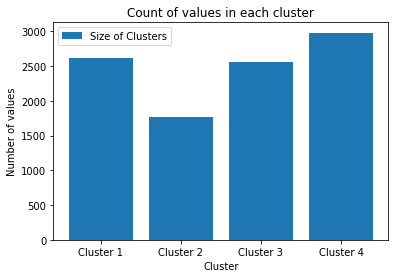

In [76]:
plt.bar(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],[a,b,c,d], label="Size of Clusters")
plt.legend()

# The following commands add labels to our figure.
plt.xlabel('Cluster')
plt.ylabel('Number of values')
plt.title('Count of values in each cluster')

plt.show()

In [77]:
data0.columns

Index(['district', 'gender', 'race', 'major_award_count', 'allegation_count',
       'sustained_count', 'unsustained_count', 'birth_year', 'black', 'white',
       'hispanic', 'blackpop', 'whitepop', 'hispanicpop', 'cluster'],
      dtype='object')

## Cluster 1

array([[<AxesSubplot:title={'center':'district'}>]], dtype=object)

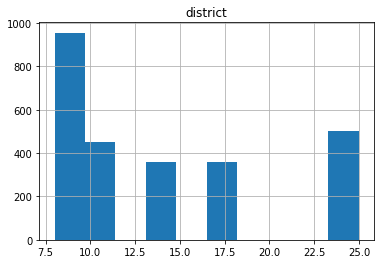

In [78]:
data0.hist(column='district')
     

array([[<AxesSubplot:title={'center':'gender'}>]], dtype=object)

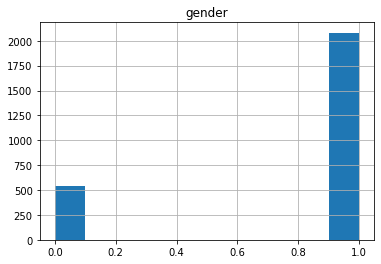

In [79]:
data0.hist(column='gender')

array([[<AxesSubplot:title={'center':'race'}>]], dtype=object)

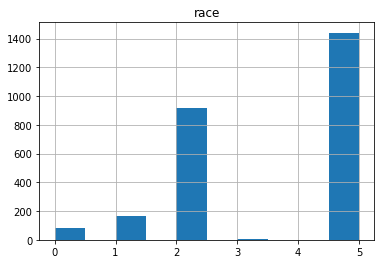

In [80]:
data0.hist(column='race')


array([[<AxesSubplot:title={'center':'major_award_count'}>]], dtype=object)

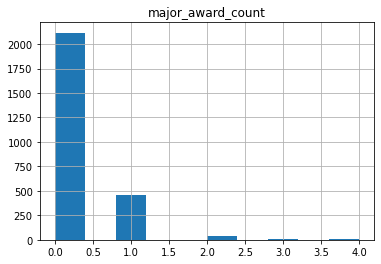

In [81]:
data0.hist(column='major_award_count')

array([[<AxesSubplot:title={'center':'allegation_count'}>]], dtype=object)

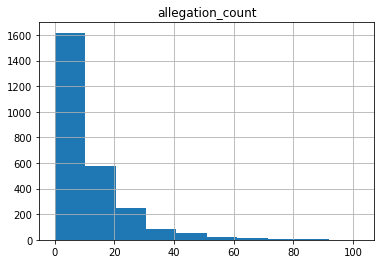

In [82]:
data0.hist(column='allegation_count')

array([[<AxesSubplot:title={'center':'sustained_count'}>]], dtype=object)

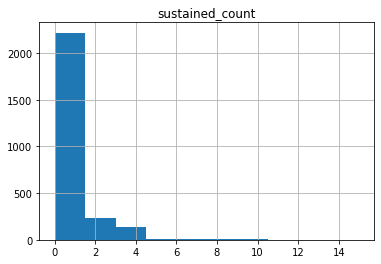

In [83]:
data0.hist(column='sustained_count')

array([[<AxesSubplot:title={'center':'unsustained_count'}>]], dtype=object)

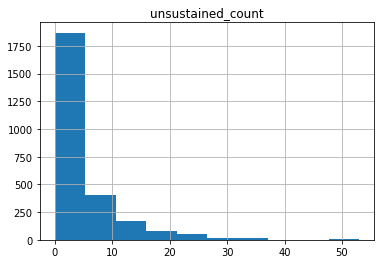

In [84]:
data0.hist(column='unsustained_count')

array([[<AxesSubplot:title={'center':'birth_year'}>]], dtype=object)

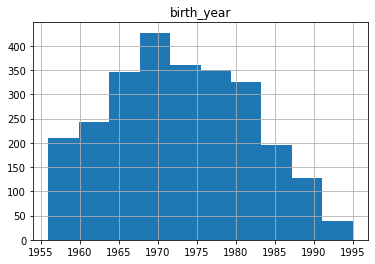

In [85]:
data0.hist(column='birth_year')

array([[<AxesSubplot:title={'center':'black'}>]], dtype=object)

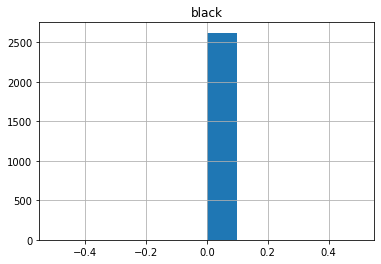

In [86]:
data0.hist(column='black')

array([[<AxesSubplot:title={'center':'white'}>]], dtype=object)

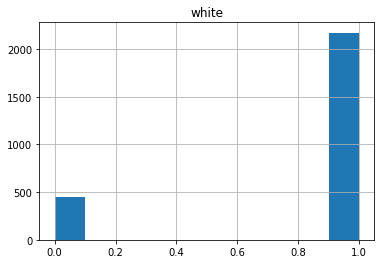

In [87]:
data0.hist(column='white')

array([[<AxesSubplot:title={'center':'hispanic'}>]], dtype=object)

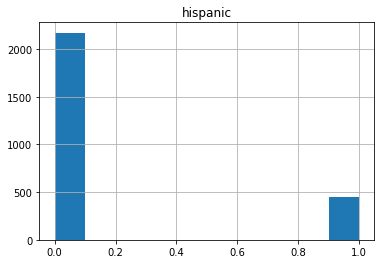

In [88]:
data0.hist(column='hispanic')

array([[<AxesSubplot:title={'center':'blackpop'}>]], dtype=object)

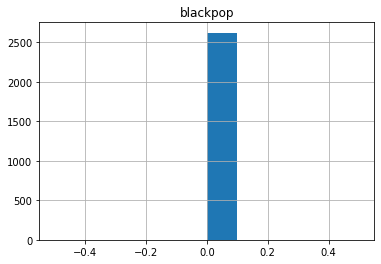

In [89]:
data0.hist(column='blackpop')

array([[<AxesSubplot:title={'center':'whitepop'}>]], dtype=object)

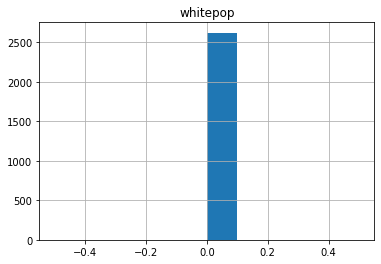

In [90]:
data0.hist(column='whitepop')

array([[<AxesSubplot:title={'center':'hispanicpop'}>]], dtype=object)

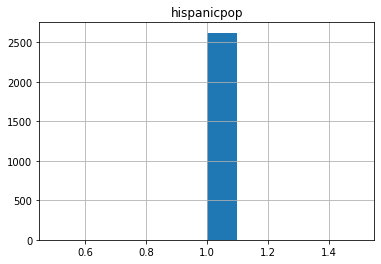

In [91]:
data0.hist(column='hispanicpop')

## Cluster 2


array([[<AxesSubplot:title={'center':'district'}>]], dtype=object)

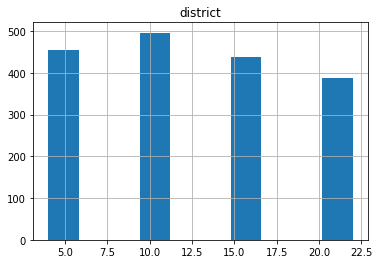

In [92]:
data1.hist(column='district')
     

array([[<AxesSubplot:title={'center':'gender'}>]], dtype=object)

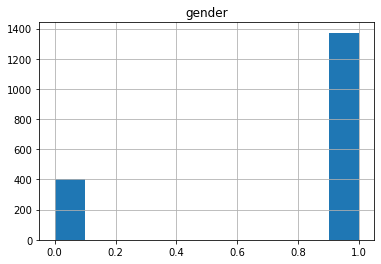

In [93]:
data1.hist(column='gender')

array([[<AxesSubplot:title={'center':'race'}>]], dtype=object)

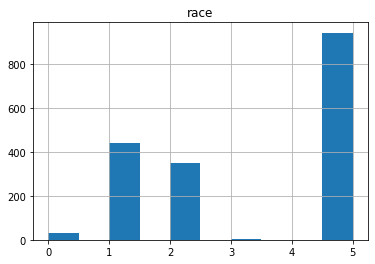

In [94]:
data1.hist(column='race')


array([[<AxesSubplot:title={'center':'major_award_count'}>]], dtype=object)

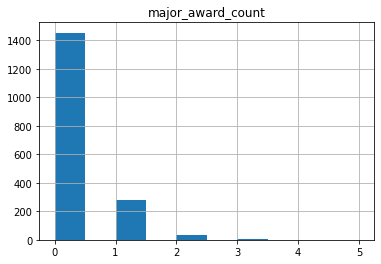

In [95]:
data1.hist(column='major_award_count')

array([[<AxesSubplot:title={'center':'allegation_count'}>]], dtype=object)

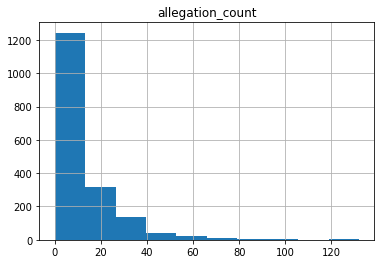

In [96]:
data1.hist(column='allegation_count')

array([[<AxesSubplot:title={'center':'sustained_count'}>]], dtype=object)

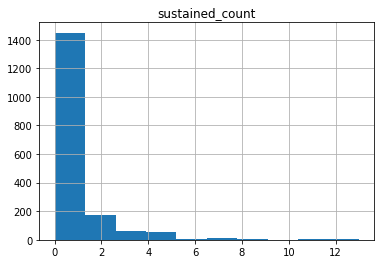

In [97]:
data1.hist(column='sustained_count')

array([[<AxesSubplot:title={'center':'unsustained_count'}>]], dtype=object)

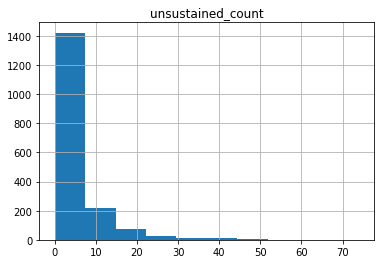

In [98]:
data1.hist(column='unsustained_count')

array([[<AxesSubplot:title={'center':'birth_year'}>]], dtype=object)

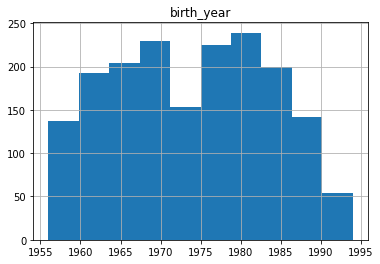

In [99]:
data1.hist(column='birth_year')

array([[<AxesSubplot:title={'center':'black'}>]], dtype=object)

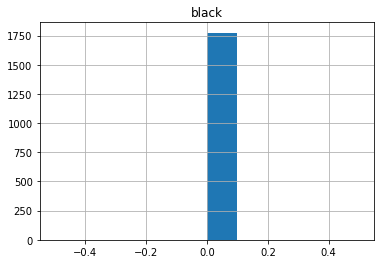

In [100]:
data1.hist(column='black')

array([[<AxesSubplot:title={'center':'white'}>]], dtype=object)

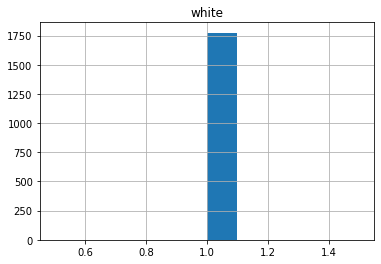

In [101]:
data1.hist(column='white')

array([[<AxesSubplot:title={'center':'hispanic'}>]], dtype=object)

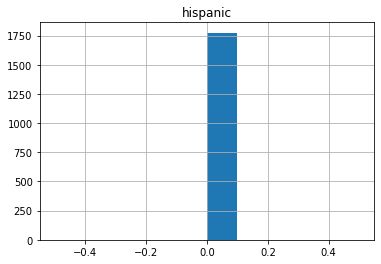

In [102]:
data1.hist(column='hispanic')

array([[<AxesSubplot:title={'center':'blackpop'}>]], dtype=object)

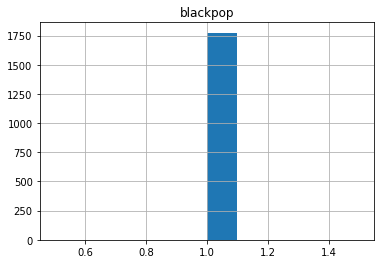

In [103]:
data1.hist(column='blackpop')

array([[<AxesSubplot:title={'center':'whitepop'}>]], dtype=object)

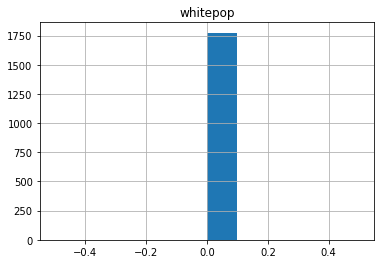

In [104]:
data1.hist(column='whitepop')

array([[<AxesSubplot:title={'center':'hispanicpop'}>]], dtype=object)

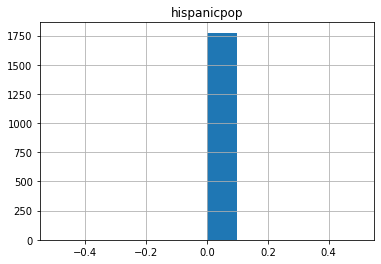

In [105]:
data1.hist(column='hispanicpop')

## Cluster 3

array([[<AxesSubplot:title={'center':'district'}>]], dtype=object)

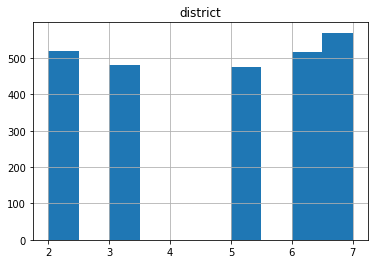

In [106]:
data2.hist(column='district')
     

array([[<AxesSubplot:title={'center':'gender'}>]], dtype=object)

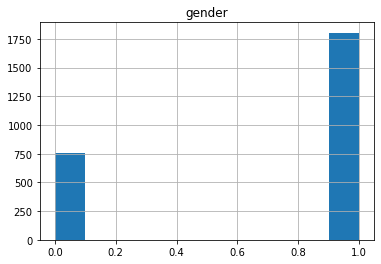

In [107]:
data2.hist(column='gender')

array([[<AxesSubplot:title={'center':'race'}>]], dtype=object)

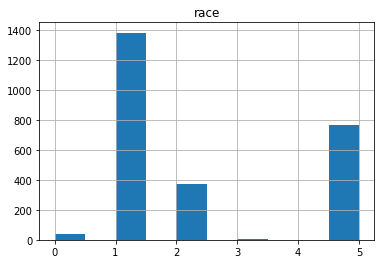

In [108]:
data2.hist(column='race')


array([[<AxesSubplot:title={'center':'major_award_count'}>]], dtype=object)

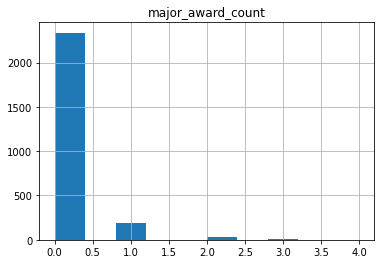

In [109]:
data2.hist(column='major_award_count')

array([[<AxesSubplot:title={'center':'allegation_count'}>]], dtype=object)

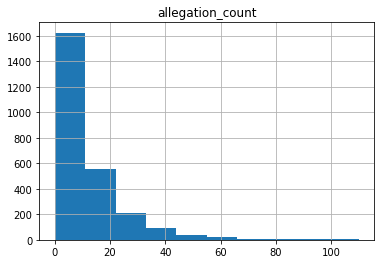

In [110]:
data2.hist(column='allegation_count')

array([[<AxesSubplot:title={'center':'sustained_count'}>]], dtype=object)

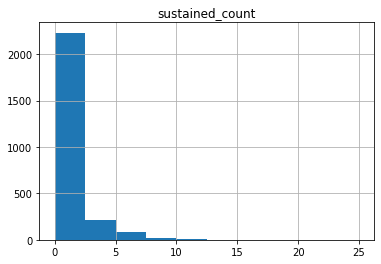

In [111]:
data2.hist(column='sustained_count')

array([[<AxesSubplot:title={'center':'unsustained_count'}>]], dtype=object)

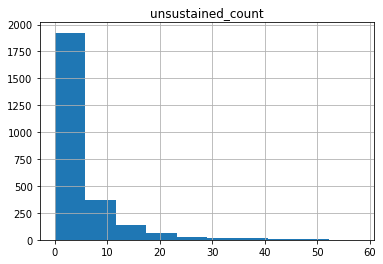

In [112]:
data2.hist(column='unsustained_count')

array([[<AxesSubplot:title={'center':'birth_year'}>]], dtype=object)

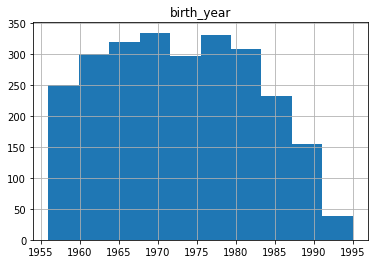

In [113]:
data2.hist(column='birth_year')

array([[<AxesSubplot:title={'center':'black'}>]], dtype=object)

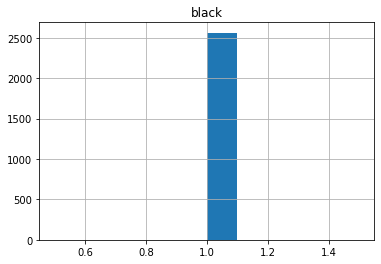

In [114]:
data2.hist(column='black')

array([[<AxesSubplot:title={'center':'white'}>]], dtype=object)

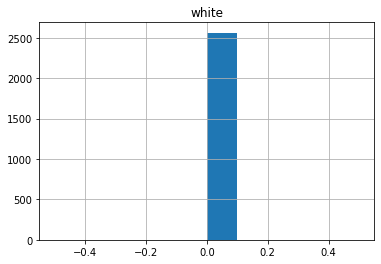

In [115]:
data2.hist(column='white')

array([[<AxesSubplot:title={'center':'hispanic'}>]], dtype=object)

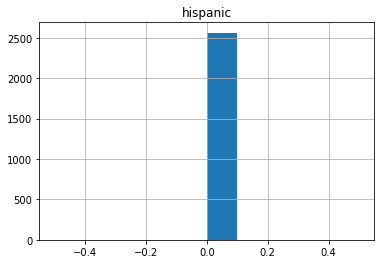

In [116]:
data2.hist(column='hispanic')

array([[<AxesSubplot:title={'center':'blackpop'}>]], dtype=object)

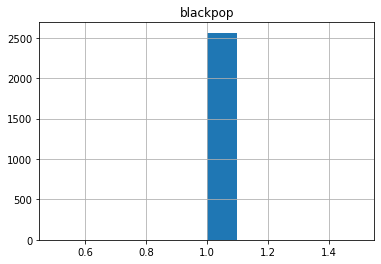

In [117]:
data2.hist(column='blackpop')

array([[<AxesSubplot:title={'center':'whitepop'}>]], dtype=object)

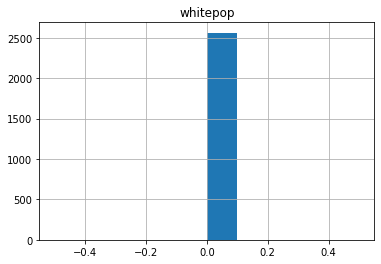

In [118]:
data2.hist(column='whitepop')

array([[<AxesSubplot:title={'center':'hispanicpop'}>]], dtype=object)

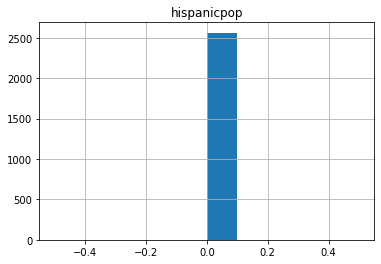

In [119]:
data2.hist(column='hispanicpop')

## Cluster 4

array([[<AxesSubplot:title={'center':'district'}>]], dtype=object)

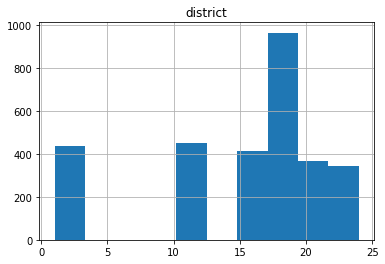

In [120]:
data3.hist(column='district')
     

array([[<AxesSubplot:title={'center':'gender'}>]], dtype=object)

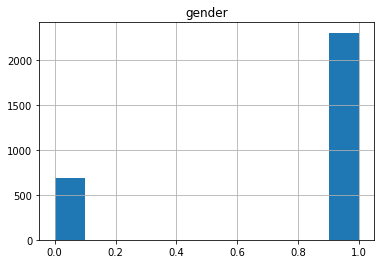

In [121]:
data3.hist(column='gender')

array([[<AxesSubplot:title={'center':'race'}>]], dtype=object)

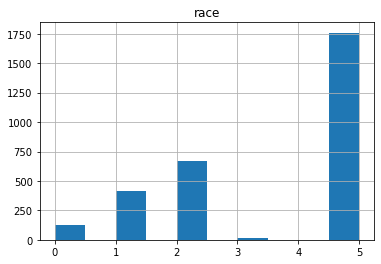

In [122]:
data3.hist(column='race')


array([[<AxesSubplot:title={'center':'major_award_count'}>]], dtype=object)

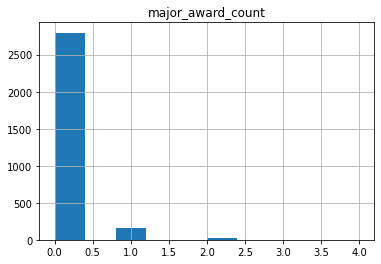

In [123]:
data3.hist(column='major_award_count')

array([[<AxesSubplot:title={'center':'allegation_count'}>]], dtype=object)

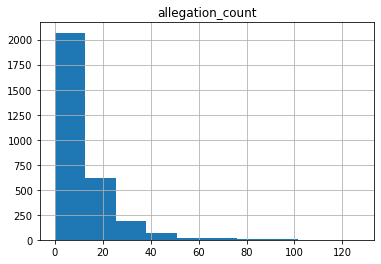

In [124]:
data3.hist(column='allegation_count')

array([[<AxesSubplot:title={'center':'sustained_count'}>]], dtype=object)

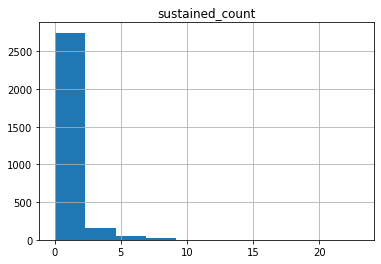

In [125]:
data3.hist(column='sustained_count')

array([[<AxesSubplot:title={'center':'unsustained_count'}>]], dtype=object)

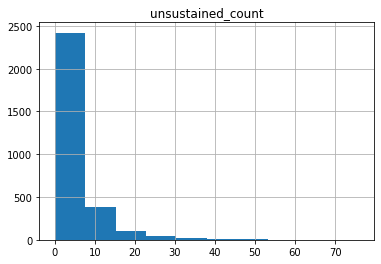

In [126]:
data3.hist(column='unsustained_count')

array([[<AxesSubplot:title={'center':'birth_year'}>]], dtype=object)

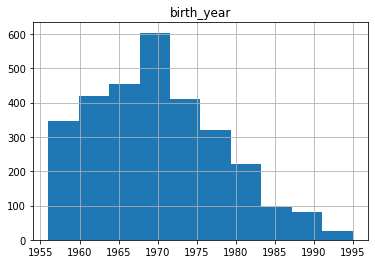

In [127]:
data3.hist(column='birth_year')

array([[<AxesSubplot:title={'center':'black'}>]], dtype=object)

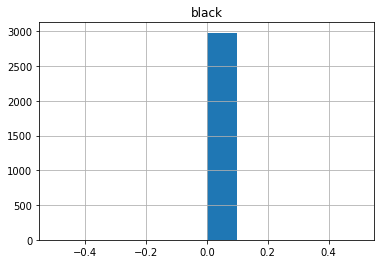

In [128]:
data3.hist(column='black')

array([[<AxesSubplot:title={'center':'white'}>]], dtype=object)

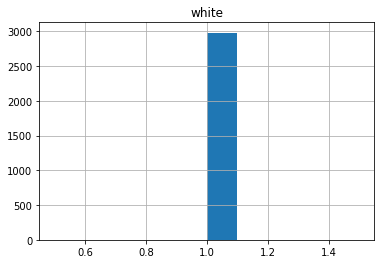

In [129]:
data3.hist(column='white')

array([[<AxesSubplot:title={'center':'hispanic'}>]], dtype=object)

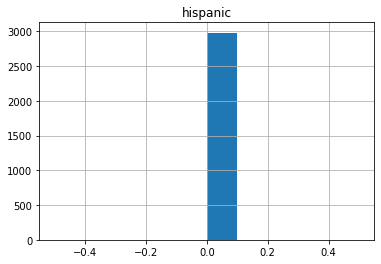

In [130]:
data3.hist(column='hispanic')

array([[<AxesSubplot:title={'center':'blackpop'}>]], dtype=object)

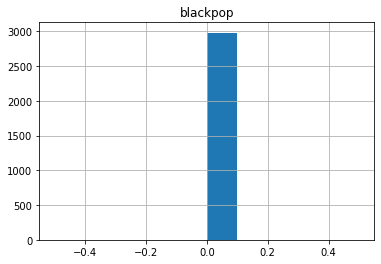

In [131]:
data3.hist(column='blackpop')

array([[<AxesSubplot:title={'center':'whitepop'}>]], dtype=object)

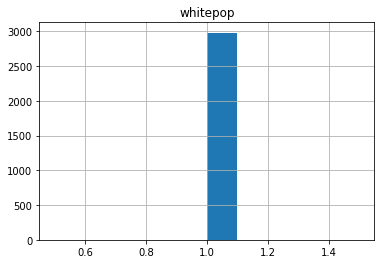

In [132]:
data3.hist(column='whitepop')

array([[<AxesSubplot:title={'center':'hispanicpop'}>]], dtype=object)

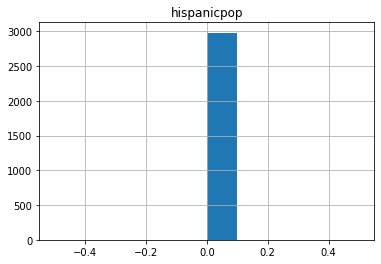

In [133]:
data3.hist(column='hispanicpop')